In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [28]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1', parse_dates=True) 
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

movie_ratings = pd.merge(movies, ratings)
df = pd.merge(movie_ratings, users)

df.head(2)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076


In [15]:

ratings.head(1)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949


In [17]:
movies.head(1)

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...


In [19]:
users.head(1)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711


In [29]:
#Pré-Processamento dos Dados
df.drop(df.columns[[3,4,7]], axis=1, inplace=True)
ratings.drop("unix_timestamp", inplace = True, axis = 1) 
movies.drop(movies.columns[[3,4]], inplace = True, axis = 1)
#Dropping all the columns that are not really needed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
movie_id        100000 non-null int64
title           100000 non-null object
release_date    99991 non-null object
user_id         100000 non-null int64
rating          100000 non-null int64
age             100000 non-null int64
sex             100000 non-null object
occupation      100000 non-null object
zip_code        100000 non-null object
dtypes: int64(4), object(5)
memory usage: 7.6+ MB


In [32]:
movie_stats = df.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [35]:
#Definir um limite de pelo menos 50 classificações para uma melhor análise.
min_50 = movie_stats['rating']['size'] >= 50
movie_stats[min_50].sort_values([('rating', 'mean')], ascending=False).head(10)

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000

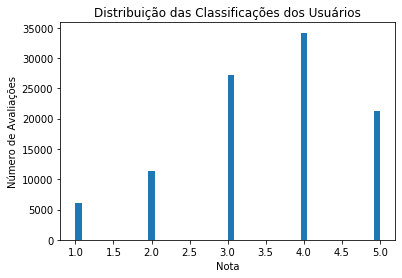

In [38]:
#Gráfico da Distruibuição de Notas
ratings.rating.plot.hist(bins=50)
plt.title("Distribuição das Classificações dos Usuários")
plt.ylabel('Número de Avaliações')
plt.xlabel('Nota');

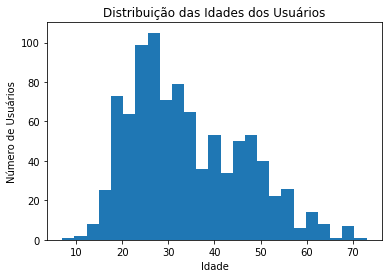

In [40]:
#Gráfico da Distruibuição Etária
users.age.plot.hist(bins=25)
plt.title("Distribuição das Idades dos Usuários")
plt.ylabel('Número de Usuários')
plt.xlabel('Idade');


In [42]:
#Tabela Pivo
ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )
ratings_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Similaridade Cosine
movie_similarity = 1 - pairwise_distances( ratings_matrix.as_matrix(), metric="cosine" )
np.fill_diagonal( movie_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
ratings_matrix = pd.DataFrame( movie_similarity )
ratings_matrix.head(5)

c:\users\win\pycharmprojects\movies\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.935912,0.928831,0.957637,0.916233,0.651198,0.978220,0.959612,0.961444,0.877940,...,0.301147,0.364751,0.278488,0.278488,0.391712,0.063420,0.063420,0.063420,0.445386,0.475924
1,0.935912,0.000000,0.911951,0.959204,0.935695,0.578273,0.926992,0.926935,0.885918,0.805475,...,0.246639,0.308845,0.251910,0.251910,0.301531,0.050834,0.050834,0.050834,0.478170,0.477571
2,0.928831,0.911951,0.000000,0.918938,0.909503,0.620559,0.944328,0.881178,0.908247,0.818130,...,0.238607,0.276156,0.297600,0.297600,0.376613,0.061653,0.061653,0.061653,0.432209,0.516444
3,0.957637,0.959204,0.918938,0.000000,0.933211,0.665996,0.962338,0.972948,0.948160,0.891714,...,0.290094,0.385551,0.256391,0.256391,0.357958,0.058033,0.058033,0.058033,0.469420,0.511942
4,0.916233,0.935695,0.909503,0.933211,0.000000,0.584300,0.922381,0.901462,0.891050,0.787281,...,0.246367,0.292211,0.264669,0.264669,0.321959,0.054700,0.054700,0.054700,0.451055,0.483451


In [49]:
# Sistema de Recomendação
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_inp="Speed (1994)"
    inp=movies[movies['title']==user_inp].index.tolist()
    inp=inp[0]
    
    movies['similarity'] = ratings_matrix.iloc[inp]
    movies.columns = ['movie_id', 'title', 'release_date','similarity']
    movies.head(2)
    
except:
    print("Desculpe, o filme não está no banco de dados!")

In [50]:

print("Filmes recomendados com base na sua escolha de ",user_inp ,": \n", movies.sort_values( ["similarity"], ascending = False )[1:10])


Filmes recomendados com base na sua escolha de  Speed (1994) : 
      movie_id                                      title release_date  \
384       385                           True Lies (1994)  01-Jan-1994   
160       161                             Top Gun (1986)  01-Jan-1986   
402       403                              Batman (1989)  01-Jan-1989   
21         22                          Braveheart (1995)  16-Feb-1996   
95         96          Terminator 2: Judgment Day (1991)  01-Jan-1991   
209       210  Indiana Jones and the Last Crusade (1989)  01-Jan-1989   
264       265           Hunt for Red October, The (1990)  01-Jan-1990   
78         79                       Fugitive, The (1993)  01-Jan-1993   
94         95                             Aladdin (1992)  01-Jan-1992   

     similarity  
384    0.987014  
160    0.986955  
402    0.984767  
21     0.984403  
95     0.984050  
209    0.983199  
264    0.982735  
78     0.982618  
94     0.981974  
